# On Eigendecomposition of Asset Returns
### Francisco A. Ibanez

## Part 1. $\Sigma$ v. $R$
Let's define two random variables
\begin{align}
d S_{1,t} &= \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t} \\
d S_{2, t} &= \mu_{2} S_{2, t} dt + \sigma_{2} S_{2, t} \rho dW_{t} + \sigma_{2} S_{2, t} \sqrt{1 - \rho^{2}} dZ_{t}
\end{align}

https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
https://math.stackexchange.com/questions/163470/generating-correlated-random-numbers-why-does-cholesky-decomposition-work
https://www.diva-portal.org/smash/get/diva2:938934/FULLTEXT01.pdf
http://www.columbia.edu/~mh2078/MonteCarlo/MCS_SDEs.pdf

Heatmap? is getting difficult to plot this in a easy to digest way

Points to make: 
1. When $\sigma_{1} \neq \sigma_{2}$ the eigenvectors are tilted (what about the eigenvalues? - way of showing this mathematically?)
2. The higher $|\sigma_{1} - \sigma_{2}|$, the more it will tilt towards the asset of higher variance (maybe also show the loadings? - plot with several arrows in cartesian starting from origin - this will require to increase to at least 3 variables)
3. What happens with the means? watch Rene Vidal's lecture
3. In a multi-asset framework, where you have high volatility assets, such as commodities and low volatility assets such as fixed-income, this effect cannot be ignored, hence the data has to be standardized before doing any analysis 

[[-0.33463928 -0.9423463 ]
 [-0.9423463   0.33463928]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


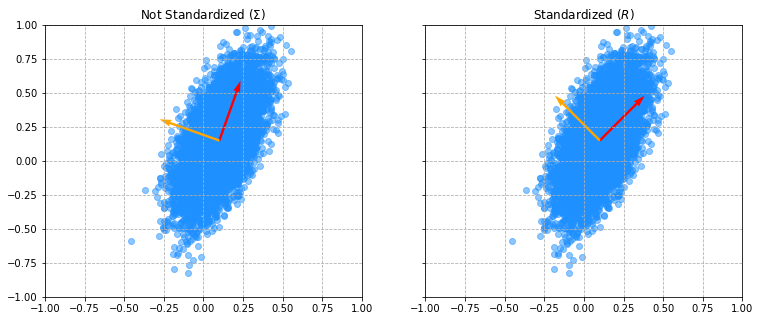

,r1,r2
r1,1.000000,0.606031
r2,0.606031,1.000000


In [29]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
np.random.seed(0)
dWt = np.random.randn(n, 2)
mu = np.array([.1, .15])
sigma = np.array([.125, .25])
rho = .6
r1 = mu[0] + sigma[0] * dWt[:, 0]
r2 = mu[1] + sigma[1] * rho * dWt[:, 0] + sigma[1] * np.sqrt(1 - rho**2) * dWt[:, 1]

matrices = {
    'Not Standardized ($\Sigma$)': np.cov(r1, r2), 
    'Standardized ($R$)': np.corrcoef(r1, r2)
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5), sharey=True, sharex=True)
for i, m in enumerate(matrices):
    L, V = np.linalg.eig(matrices[m])
    order = L.argsort()[::-1]
    L = L[order]
    V = V[:, order]
    flip_sign = np.sign(V[:, 0].sum())
    print(V)
    axs[i].set_title(m)
    axs[i].scatter(r1, r2, color='dodgerblue', alpha=.5)
    axs[i].set_xlim(-1, 1)
    axs[i].set_ylim(-1, 1)
    axs[i].quiver(*mu, *V[:, 0] * flip_sign, color=['r'], scale=5)
    axs[i].quiver(*mu, *V[:, 1], color=['orange'], scale=5)  # Scale should be proportional to the eigenvalue
    axs[i].grid(ls='--')
plt.show()

rr = pd.DataFrame()
rr['r1'] = r1
rr['r2'] = r2
rr.corr()

Assuming a market where the price dynamics of an asset can be given by the following SDE

\begin{align} \label{eq:1}
d P_{t} &= \mu_{i} P_{t} dt + \sigma P_{t} dW_{t} \\
\end{align}

Equation \ref{eq:1} can be expanded to a two-asset framework with non-perfect correlation as follows: 

\begin{align} \label{eq:2}
d S_{1,t} &= \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t} \\
d S_{2, t} &= \mu_{2} S_{2, t} dt + \sigma_{2} S_{2, t} \rho dW_{t} + \sigma_{2} S_{2, t} \sqrt{1 - \rho^{2}} dZ_{t}
\end{align}

where $\rho_{i, j}$ is the correlation coefficient between asset $i$ and asset $j$. To generalize the system above for multiple assets, we can summarize all these interactions in the correlation matrix $R$ 

\begin{align}
R = \begin{bmatrix} 1 & \rho_{1, 2} & \cdots & \rho_{1, n} \\ \rho_{2, 1} & 1 & \cdots & \rho_{2, n} \\ \vdots & \vdots & \ddots & \vdots \\ \rho_{n, 1} & \rho_{n, 2} & \cdots & \rho_{n, n}\end{bmatrix}
\end{align}

and apply the Cholesky decomposition on $R$ in order to generalize the 

\begin{align}
R &= LL^{T} \\
\end{align}

Generic case:
\begin{align}
\frac{dP}{P} = \mu dt + S L W_{t}
\end{align}

In the case of three assets and no drift we have:

\begin{align}
\begin{bmatrix}
\frac{dP_{1,t}}{P_{1,t}} \\ \frac{dP_{2,t}}{P_{2,t}} \\ \frac{dP_{3,t}}{P_{3,t}}
\end{bmatrix} = \begin{bmatrix} \sigma_{1} & 0 & 0 \\ 0 & \sigma_{2} & 0 \\ 0 & 0 & \sigma_{3} \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 \\ \rho_{2,1} & \sqrt{1 - \rho_{2,1}^{2}} & 0 \\ \rho_{3,1} & \frac{\rho_{3,2} - \rho_{3,1}\rho_{2,1}}{\sqrt{1 - \rho_{2,1}^{2}}} & \sqrt{1 - \rho_{2,1}^{2} - \left( \frac{\rho_{3,2} - \rho_{3,1}\rho_{2,1}}{\sqrt{1 - \rho_{2,1}^{2}}} \right)^{2}} \end{bmatrix}
\begin{bmatrix} dW_{1, t} \\ dW_{2, t} \\ dW_{3, t} \end{bmatrix}
\end{align} 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 10000
np.random.seed(0)
dWt = np.random.randn(n, 3)
Rho = np.array([
    [1, .5, .3],
    [.5, 1, .4],
    [.3, .4, 1]
])
L = np.linalg.cholesky(Rho)
S = np.diag([.15, .10, .05])
r = S @ L @ dWt.T

pd.DataFrame(r.T).corr()

,0,1,2
0,1.000000,0.513209,0.294036
1,0.513209,1.000000,0.410936
2,0.294036,0.410936,1.000000


## Part 2. Impact of outliers

http://faculty.baruch.cuny.edu/jgatheral/JumpDiffusionModels.pdf

\begin{align}
d S_{1,t} &= \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t} + S_{1, t} d J_{1, t}\\
d S_{2, t} &= \mu_{2} S_{2, t} dt + \sigma_{2} S_{2, t} \rho dW_{t} + \sigma S_{2, t} \sqrt{1 - \rho^{2}} dZ_{t}  + S_{2, t} d J_{2, t}
\end{align}

Points to make:
1. Financial time series are rarely distributed normal (left tail events)
2. Add jump difussion to the exercise above, show the impact of the jumps in the resulting eigenvalues (paint the outliers differently)
3. Is it possible to measure the impact? (even if it's through simulations)

[[-0.32782567 -0.94473823]
 [-0.94473823  0.32782567]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


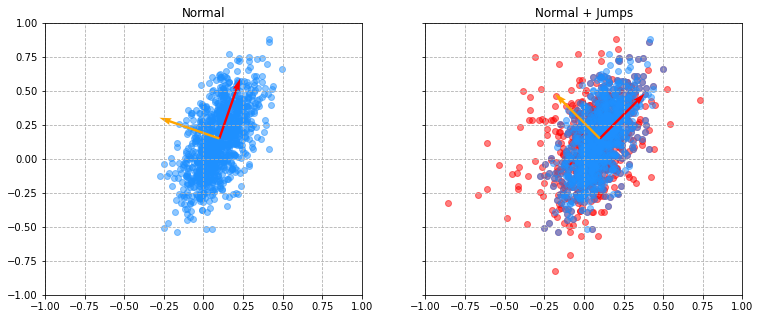

In [232]:
np.random.seed(0)
jump_location = np.random.poisson(lam=.25, size=(n, 2))
jump_magnitude = np.random.normal(loc=-.1, scale=.15, size=(n, 2))
dJt = np.multiply(jump_location, jump_magnitude)

r1j = r1 + dJt[:, 0].flatten()
r2j = r2 + dJt[:, 1].flatten()

matrices = {
    'Normal': np.cov(r1, r2), 
    'Normal + Jumps': np.cov(r2j, r2j)
}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5), sharey=True, sharex=True)
for i, m in enumerate(matrices):
    L, V = np.linalg.eig(matrices[m])
    order = L.argsort()[::-1]
    L = L[order]
    V = V[:, order]
    flip_sign = np.sign(V[:, 0].sum())
    
    print(V)
    
    axs[i].set_title(m)
    if i == 1:
        axs[i].scatter(r1j, r2j, color='red', alpha=.5)
    axs[i].scatter(r1, r2, color='dodgerblue', alpha=.5)
    axs[i].set_xlim(-1, 1)
    axs[i].set_ylim(-1, 1)
    axs[i].quiver(*mu, *V[:, 0] * flip_sign, color=['r'], scale=5)
    axs[i].quiver(*mu, *V[:, 1], color=['orange'], scale=5)  # Scale should be proportional to the eigenvalue
    axs[i].grid(ls='--')
plt.show()

In [233]:
print(np.corrcoef(r1j, r2j))
print(np.corrcoef(r1, r2))
print(np.linalg.eig(np.cov(r1j, r2j)))
print(np.linalg.eig(np.cov(r1, r2)))
np.sqrt(2)/2

[[1.         0.42812949]
 [0.42812949 1.        ]]
[[1.         0.58989076]
 [0.58989076 1.        ]]
(array([0.0187571 , 0.07381932]), array([[-0.94024493, -0.34049885],
       [ 0.34049885, -0.94024493]]))
(array([0.0087819 , 0.06524196]), array([[-0.94473823, -0.32782567],
       [ 0.32782567, -0.94473823]]))


0.7071067811865476

<AxesSubplot:ylabel='Frequency'>

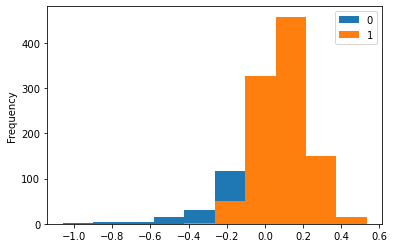

In [217]:
pd.DataFrame([r1j, r1]).T.plot.hist()

## Part 3. Robust PCA?

Points to make:
1. Introduce RPCA?
2. Identify and deal with the outliers

## Part 4. Eigenvalue matrix truncation

Points to make:
1. Noise might also be captured by the last eigenvalues
2. Given the ordered nature of the eigenvalues, main drivers of return are identified in the first N eigenvectors
3. More eigenvectors to equalize (SRP) more computation time 
3. Dropping last eigenvectors should reduce noise in the projection and speed up the computation time

## Part 5. The Eigenvector Sign Issue ($J$)

Points to make:
1. How can I select a $j$ within the $2^{N-1}$ columns of $J$?